### Setup display stuff

In [1]:
# https://github.com/tensorflow/agents/blob/473b15591ce0fb7edc7352571b7a97d54dd11d93/tf_agents/colabs/6_reinforce_tutorial.ipynb
!apt-get install xvfb
!apt install x11-utils
!pip install 'gym==0.10.11'
!pip install 'imageio==2.4.0'
!pip install PILLOW
!pip install 'pyglet==1.3.2'
!pip install pyvirtualdisplay


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 783 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.7 [783 kB]
Fetched 783 kB in 0s (6,671 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.7_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.7) ...
Setting up xvfb (2:1.19.6-1ubuntu4.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packag

In [2]:
import base64
import imageio
import IPython
import PIL.Image
import pyvirtualdisplay

In [3]:
# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

--------------------------------

### Start Gym Tutorial

In [4]:
import gym
import gym.spaces
import matplotlib.pyplot as plt
import numpy as np

In [5]:
class Env(object):
    # Set these in ALL subclasses
    action_space = None
    observation_space = None

    def step(self, action):
        """
        Args:
            action (object): an action provided by the agent
        Returns:
            observation (object): agent's observation of the current environment
            reward (float) : amount of reward returned after previous action
            done (bool): whether the episode has ended, in which case further step() calls will return undefined results
            info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning)
        """
        raise NotImplementedError

    def reset(self):
        """
        Returns:
            observation (object): the initial observation.
        """
        raise NotImplementedError

In [6]:
class PointMassEnv(gym.Env):
  
  def __init__(self):
    self.action_space = gym.spaces.Box(low=-0.1 * np.ones(2),
                                       high=0.1 * np.ones(2),
                                       dtype=np.float32)
    self.observation_space = gym.spaces.Box(low=np.zeros(2),
                                           high=np.ones(2),
                                           dtype=np.float32)
    self.state = None
    self.goal = np.array([0.2, 0.8])
  
  def reset(self):
    self.state = np.array([0.5, 0.5])
    return self.state.copy()
  
  def step(self, action):
    assert self.action_space.contains(action)
    self.state = self.state + action
    self.state = np.clip(self.state, 0, 1)
    obs = self.state.copy()
    dist_to_goal = np.linalg.norm(self.state - self.goal)
    reward = -1.0 * dist_to_goal
    done = (dist_to_goal < 0.1)
    info = {}
    return obs, reward, done, info

In [7]:
env = PointMassEnv()
obs = env.reset()
print('Initial observation = %s' % obs)
a = np.array([0.1, 0.1])
obs, reward, done, info = env.step(a)
print('Next observation = %s' % obs)

Initial observation = [0.5 0.5]
Next observation = [0.6 0.6]


In [8]:
env = PointMassEnv()
obs = env.reset()
obs_vec = [obs]
done = False
while not done:
  a = env.action_space.sample()
  obs, reward, done, info = env.step(a)
  obs_vec.append(obs)

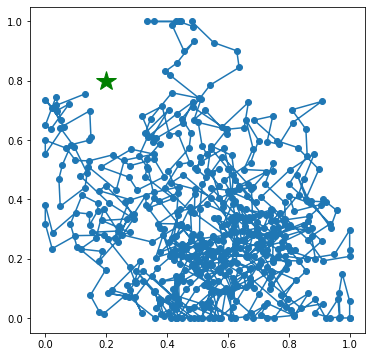

In [9]:
obs_vec = np.array(obs_vec)
plt.figure(figsize=(6, 6))
plt.plot(obs_vec[:, 0], obs_vec[:, 1], '-o')
plt.plot([env.goal[0]], [env.goal[1]], '*', c='g', markersize=20)
plt.show()

In [10]:
for name in gym.envs.registry.all():
  print(name.id)

Copy-v0
RepeatCopy-v0
ReversedAddition-v0
ReversedAddition3-v0
DuplicatedInput-v0
Reverse-v0
CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v0
Acrobot-v1
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v2
BipedalWalkerHardcore-v2
CarRacing-v0
Blackjack-v0
KellyCoinflip-v0
KellyCoinflipGeneralized-v0
FrozenLake-v0
FrozenLake8x8-v0
CliffWalking-v0
NChain-v0
Roulette-v0
Taxi-v2
GuessingGame-v0
HotterColder-v0
Reacher-v2
Pusher-v2
Thrower-v2
Striker-v2
InvertedPendulum-v2
InvertedDoublePendulum-v2
HalfCheetah-v2
Hopper-v2
Swimmer-v2
Walker2d-v2
Ant-v2
Humanoid-v2
HumanoidStandup-v2
FetchSlide-v1
FetchPickAndPlace-v1
FetchReach-v1
FetchPush-v1
HandReach-v0
HandManipulateBlockRotateZ-v0
HandManipulateBlockRotateParallel-v0
HandManipulateBlockRotateXYZ-v0
HandManipulateBlockFull-v0
HandManipulateBlock-v0
HandManipulateEggRotate-v0
HandManipulateEggFull-v0
HandManipulateEgg-v0
HandManipulatePenRotate-v0
HandManipulatePenFull-v0
HandManipulatePen-v0
FetchSlideDen

In [11]:
env = gym.make('CartPole-v0')

In [12]:
env.action_space

Discrete(2)

In [13]:
env.observation_space

Box(4,)

### Visualization

In [14]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

In [16]:
env = gym.make('CartPole-v0')
# env = gym.make('MountainCar-v0')
# env = gym.make('Acrobot-v1')
# env = gym.make('LunarLander-v2')
# env = gym.make('BipedalWalker-v2')
# env = gym.make('RoboschoolAnt-v1')
# env = gym.make('RoboschoolHumanoid-v1')
# env = gym.make('RoboschoolAtlasForwardWalk-v1')
# env = gym.make('RoboschoolPong-v1')

num_steps = 1000
video_filename = 'imageio.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  done = False
  obs = env.reset()
  video.append_data(env.render(mode='rgb_array'))
  for _ in range(num_steps):
    _, _, _, _ = env.step(env.action_space.sample())
    video.append_data(env.render(mode='rgb_array'))

embed_mp4(video_filename)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [17]:
# Install box2d-py to get some environments to work
!pip install box2d-py

     |████████████████████████████████| 450kB 12.7MB/s 


In [18]:
!pip install roboschool

     |████████████████████████████████| 48.9MB 93kB/s 


In [19]:
import roboschool
for name in gym.envs.registry.all():
  if 'Roboschool' in name.id:
    print(name.id)

ImportError: ignored